In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Check the data

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.shape

(42000, 785)

In [10]:
test.shape

(28000, 784)

In [ ]:
# There are far too more of them for my machine to compute every K possibility from 1 to 50
# We will try to find correct K based on smaller subset
# We will use random 1000 of rows

In [11]:
sample = train.sample(1000)
X_train, X_test, y_train, y_test = train_test_split(sample.drop('label', axis=1),sample['label'],
                                                    test_size=0.30)

In [12]:
sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23045,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13887,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10528,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now we need to find best K

In [13]:
def getBestKValue(range, X_train, X_test, y_train, y_test):
    error_rate = []
    for i in range:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        prediction_i = knn.predict(X_test)
        error_rate.append(np.mean(prediction_i != y_test))
    return error_rate

In [16]:
error_rate = getBestKValue(range(1,50), X_train, X_test, y_train, y_test)

In [17]:
error_rate

[0.13,
 0.14666666666666667,
 0.14,
 0.14666666666666667,
 0.14333333333333334,
 0.13333333333333333,
 0.13666666666666666,
 0.15,
 0.14333333333333334,
 0.14333333333333334,
 0.15333333333333332,
 0.15666666666666668,
 0.16,
 0.15666666666666668,
 0.15666666666666668,
 0.16666666666666666,
 0.17333333333333334,
 0.18,
 0.17666666666666667,
 0.18666666666666668,
 0.18666666666666668,
 0.2,
 0.22,
 0.21333333333333335,
 0.22,
 0.23,
 0.22,
 0.22666666666666666,
 0.22666666666666666,
 0.23,
 0.24,
 0.24,
 0.23666666666666666,
 0.23333333333333334,
 0.23333333333333334,
 0.23,
 0.24333333333333335,
 0.25333333333333335,
 0.26,
 0.26666666666666666,
 0.26666666666666666,
 0.27666666666666667,
 0.27,
 0.2733333333333333,
 0.27,
 0.27,
 0.2733333333333333,
 0.28,
 0.2866666666666667]

Text(0, 0.5, 'Error Rate')

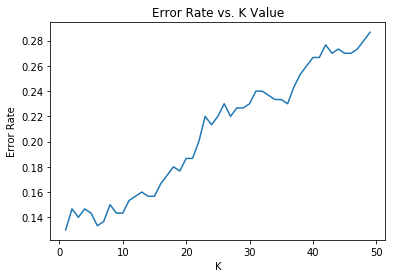

In [24]:
sns.lineplot(x=range(1,50),y=error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Looks quite bad. But maybe cause of small sample. Try again with bigger
# We will reduce range of search too Kmax = 20

In [25]:
sample = train.sample(5000)
X_train, X_test, y_train, y_test = train_test_split(sample.drop('label', axis=1),sample['label'],
                                                    test_size=0.30)

In [26]:
error_rate = getBestKValue(range(1,20), X_train, X_test, y_train, y_test)

In [ ]:
# Plot it again

Text(0, 0.5, 'Error Rate')

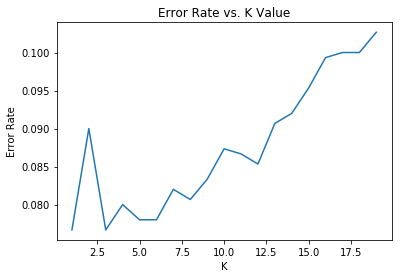

In [27]:
sns.lineplot(x=range(1,20),y=error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Looks like best K will be around 3

In [7]:
# Lets start with processing

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('label', axis=1),train['label'],
                                                    test_size=0.30)

In [48]:
y_test.head()

16009    1
32455    8
4363     7
13649    2
10255    9
Name: label, dtype: int64

In [10]:
# This part will take a moment. A very long moment.
# So get a tea, and wait in patience

In [ ]:
# First to check, second for result

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction_check = knn.predict(X_test)

In [64]:
prediction = knn.predict(test)

In [56]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,prediction_check))
print('\n')
print(classification_report(y_test,prediction_check))

WITH K=3


[[1216    0    0    0    0    3    2    0    1    1]
 [   0 1368    1    1    1    0    1    3    0    2]
 [   4   13 1236    4    1    2    1   20    5    2]
 [   0    4    9 1291    0   17    0    6    6    6]
 [   2   13    0    0 1144    0    3    2    0   39]
 [   6    1    1   19    2 1123   13    3    2    9]
 [   2    0    0    0    2    7 1238    0    0    0]
 [   0   12    2    0    4    0    0 1255    0   13]
 [   5   15    8   28    6   23    7    8 1090   14]
 [   2    0    1   10   20    1    0   11    4 1203]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1223
           1       0.96      0.99      0.98      1377
           2       0.98      0.96      0.97      1288
           3       0.95      0.96      0.96      1339
           4       0.97      0.95      0.96      1203
           5       0.95      0.95      0.95      1179
           6       0.98      0.99      0.98      1249
           7       0.96

In [43]:
test_data = test.reset_index(level=0, inplace=False)
test_data[test_data.columns[0]].shape

(28000,)

In [44]:
prediction.shape

(12600,)

In [73]:
predictions_dt = pd.DataFrame()
predictions_dt['ImageId'] = test_data[test_data.columns[0]].tolist()
predictions_dt['Label'] = prediction

In [75]:
predictions_dt['ImageId'] = predictions_dt['ImageId'] + 1

In [67]:
predictions_dt.shape

(28000, 2)

In [76]:
predictions_dt.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [77]:
predictions_dt.to_csv('predictions.csv',sep=',', encoding='utf-8', index=False)

In [ ]:
# We have our own model